In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons

In [39]:
dataset = make_moons(n_samples=1000,
                    noise=0.5,
                    random_state=0)

dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1, 1))), 
                       columns = ["x1", "x2", "y"])

dataset.head()

,x1,x2,y
0,2.216430,0.741684,1.0
1,2.057427,0.424853,1.0
2,-0.116847,0.004159,0.0
3,-0.710797,0.210482,1.0
4,0.267548,-0.460654,1.0


In [40]:
# Are the classes balanced?

dataset['y'].value_counts()

1.0    500
0.0    500
Name: y, dtype: int64

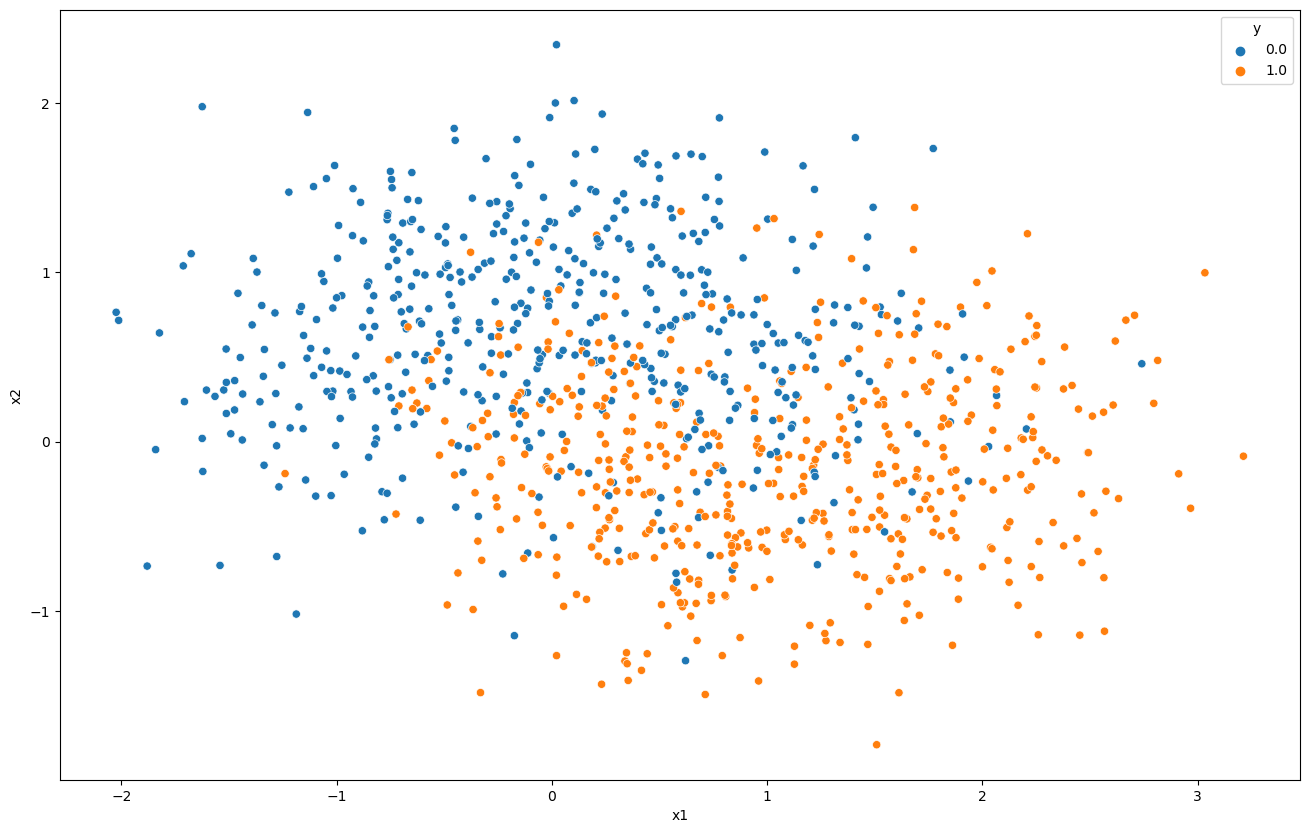

In [41]:
# plot the objects and color the classes

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.scatterplot(data=dataset,
               x="x1",
               y="x2",
               hue="y")
plt.show()

# Building a Classification Model with Decision Trees

In [42]:
from sklearn.tree import DecisionTreeClassifier

X = dataset.drop("y", axis=1)
y = dataset["y"]

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X, y)

DecisionTreeClassifier()

In [43]:
#accuracy

decision_tree.score(X, y)

1.0

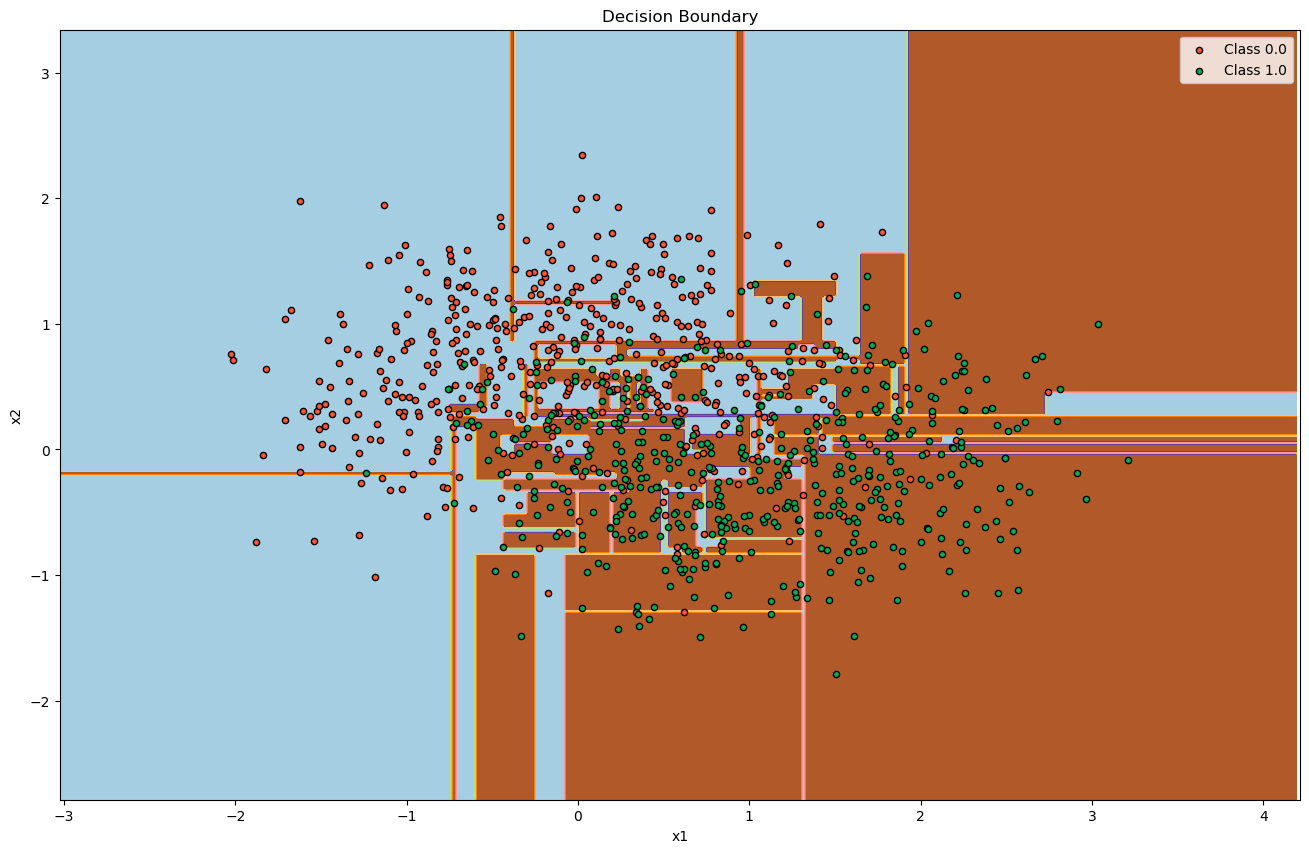

In [44]:
#Let's see how the model draws separating hyperplanes

fig = plt.figure()
fig.set_size_inches(16, 10)

### Calculate the boundaries of the feature space

pixel_step = 0.02

x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

### Generate many points on a plane

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

### For each point we give a prediction to cover the surfaces

Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

### Filling the space

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

for i, n, c in zip(range(2), decision_tree.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")

plt.show()

In [45]:
X_2, y_2 = X[:500], y[:500]

In [46]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_2, y_2)

DecisionTreeClassifier()

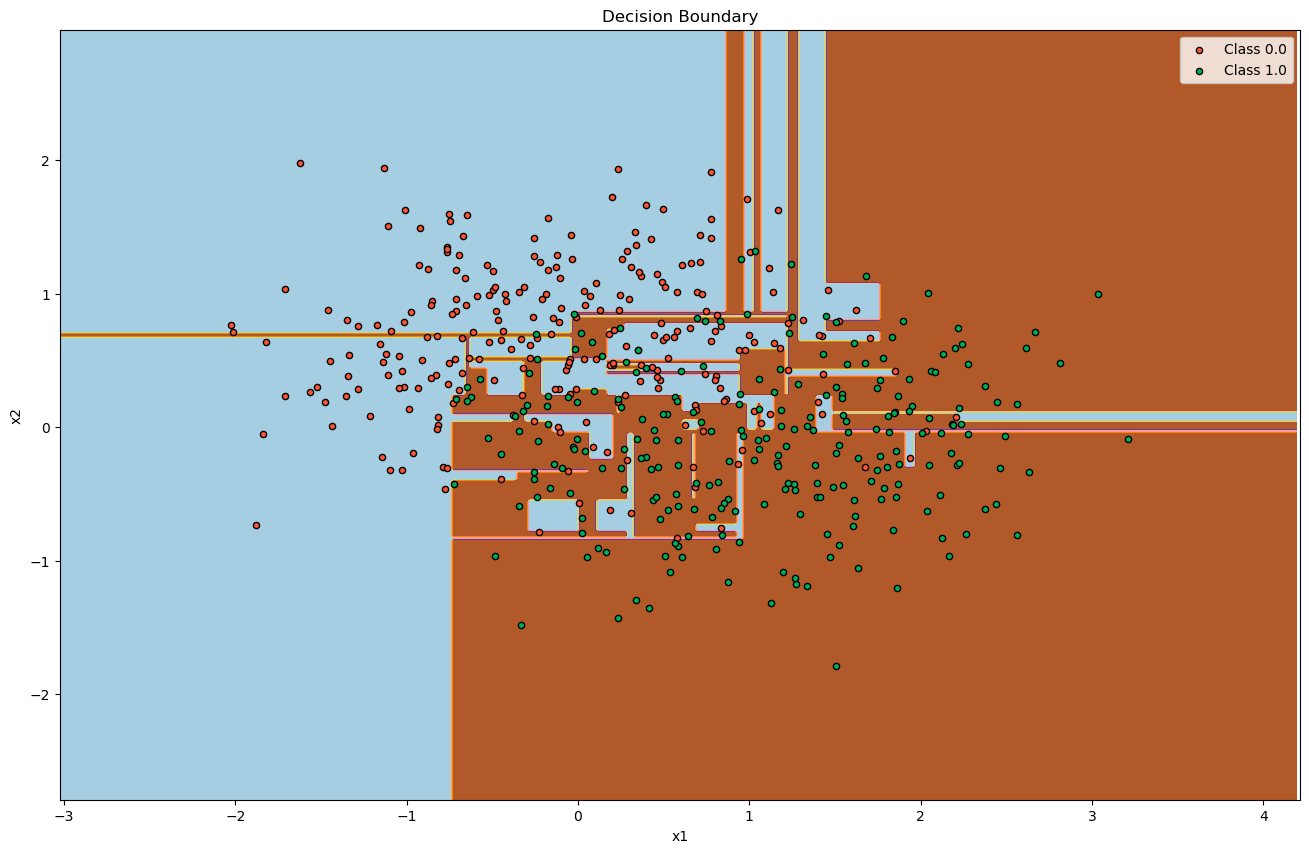

In [47]:
fig = plt.figure()
fig.set_size_inches(16, 10)

pixel_step = 0.02

x1_min, x1_max = X_2.values[:, 0].min() - 1, X_2.values[:, 0].max() + 1
x2_min, x2_max = X_2.values[:, 1].min() - 1, X_2.values[:, 1].max() + 1

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

for i, n, c in zip(range(2), decision_tree.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y_2 == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")

plt.show()

In [48]:
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

decision_tree.fit(X, y)

print(f"Accuracy equals = {decision_tree.score(X, y)}")

Accuracy equals = 0.842


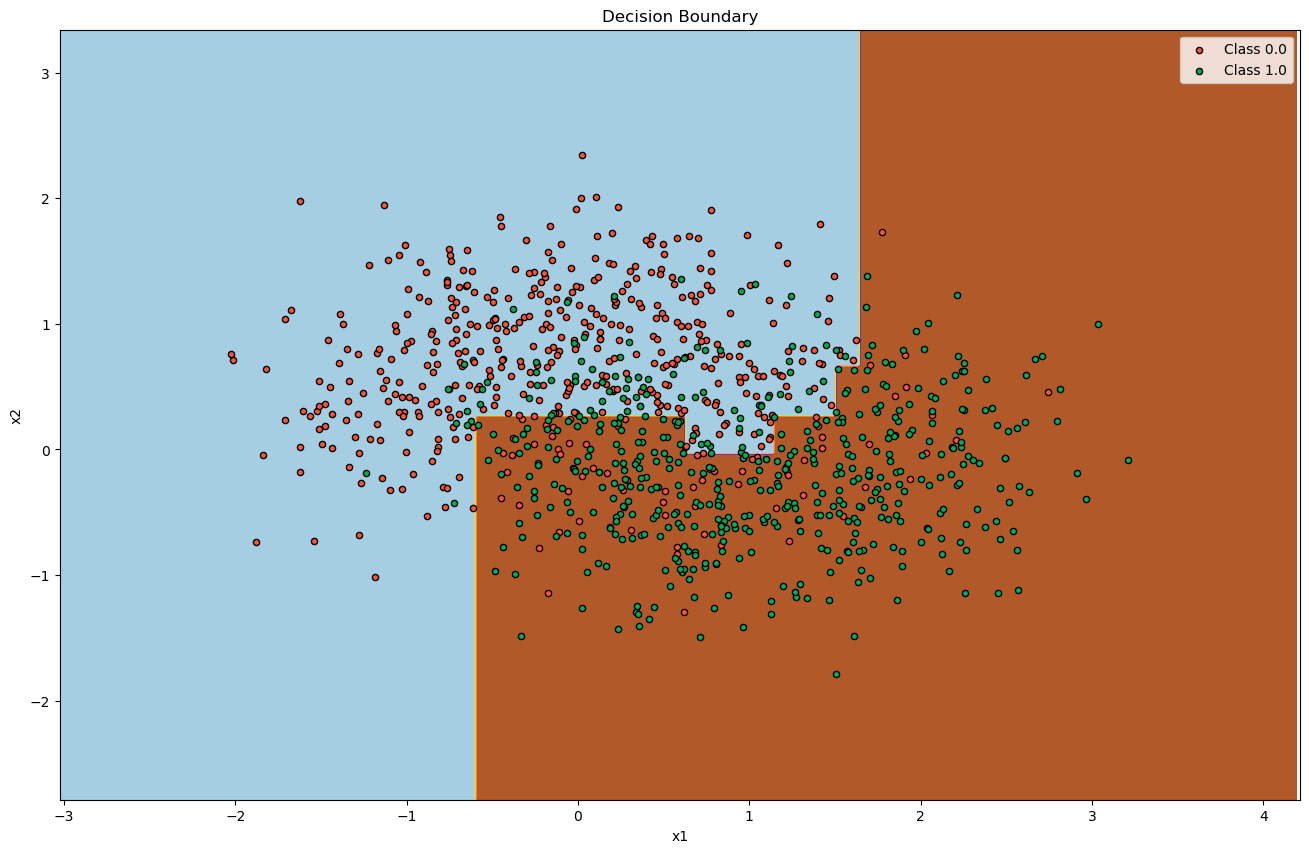

In [49]:
fig = plt.figure()
fig.set_size_inches(16, 10)

pixel_step = 0.02

x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

Z = decision_tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

for i, n, c in zip(range(2), decision_tree.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")

plt.show()

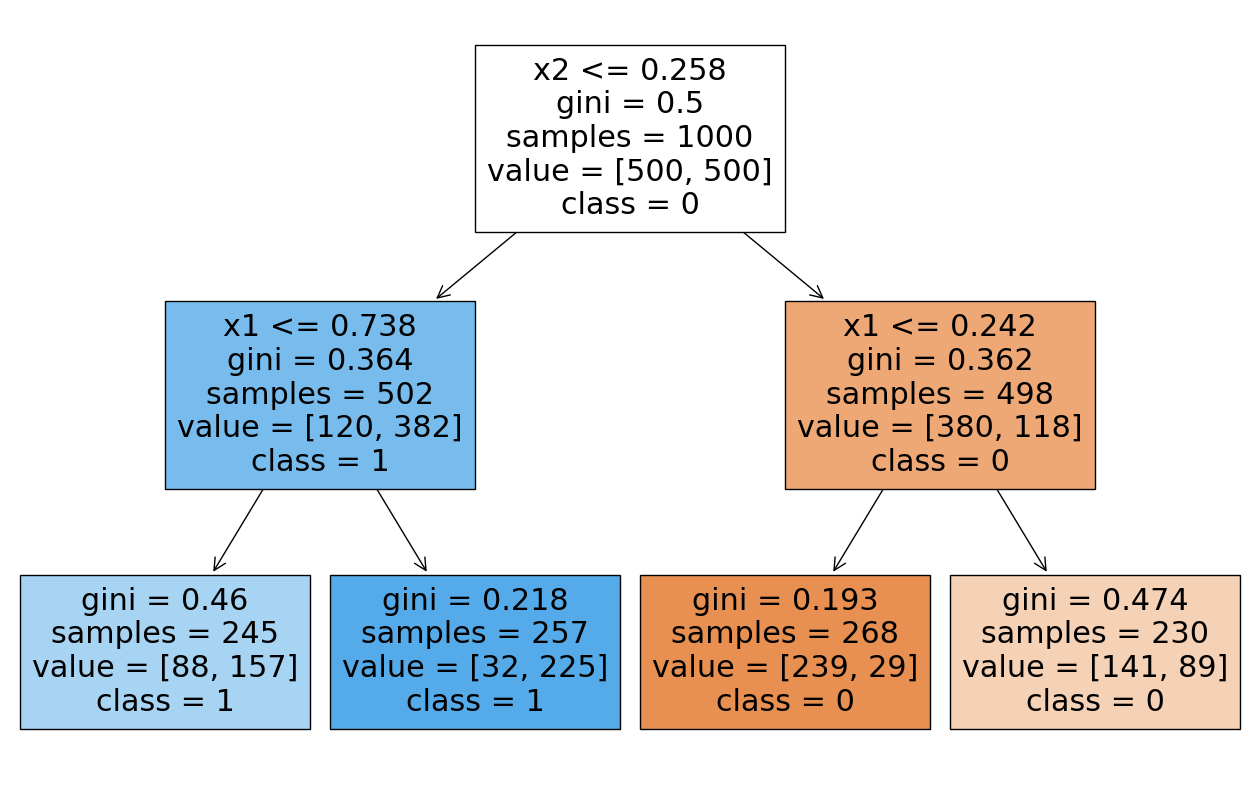

In [50]:
# plot the decision tree

from sklearn import tree

decision_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=200)
decision_tree.fit(X, y)


fig = plt.figure()
fig.set_size_inches(16, 10)

tree.plot_tree(decision_tree,
              feature_names = X.columns,
              class_names = decision_tree.classes_.astype(int).astype(str),
              filled = True)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=0)

decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)
decision_tree.fit(X_train, y_train)

print(f'Accuracy on train = {decision_tree.score(X_train, y_train).round(3)}')
print(f'Accuracy on test = {decision_tree.score(X_test, y_test).round(3)}')

Accuracy on train = 0.854
Accuracy on test = 0.805


## Nonlinear partitioning of objects

In [52]:
def new_feature(x1, x2):
    
    return 2*x1**3 - 3*x1**2 - x1 - x2

X_new = X.copy()

X_new['new_feature'] = new_feature(X.values[:, 0], X.values[:, 1])

X_new.head()

,x1,x2,new_feature
0,2.216430,0.741684,4.080901
1,2.057427,0.424853,2.236898
2,-0.116847,0.004159,0.068537
3,-0.710797,0.210482,-1.733619
4,0.267548,-0.460654,0.016663


In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Class was initialized!")
        
    def fit(self, X, y=None):
        print("Dataset was fitted!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Dataset was transformed!")
        return X_

In [54]:
custom_class = CustomFunctionTransformer("x1", "x2",
                                         lambda x,y: 2*x**3 - 3*x**2 - x - y)
custom_class.fit(X)

custom_class.transform(X)

Class was initialized!
Dataset was fitted!
Dataset was transformed!


,new_feature
0,4.080901
1,2.236898
2,0.068537
3,-1.733619
4,0.016663
...,...
995,-1.345270
996,-1.256273
997,0.394222
998,-0.610251


In [55]:
custom_class.get_params()

{'first_col': 'x1',
 'function': <function __main__.<lambda>(x, y)>,
 'second_col': 'x2'}

In [56]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("custom_transformer",
                  CustomFunctionTransformer("x1",
                                            "x2",
                                            lambda x,y: 2*x**3 - 3*x**2 - x - y)),
                 ("decision_tree",
                  DecisionTreeClassifier(max_depth=2))])

pipe.fit(X, y)

Class was initialized!
Dataset was fitted!
Dataset was transformed!


Pipeline(steps=[('custom_transformer',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x000001DC12266A70>,
                                           second_col='x2')),
                ('decision_tree', DecisionTreeClassifier(max_depth=2))])

Dataset was transformed!


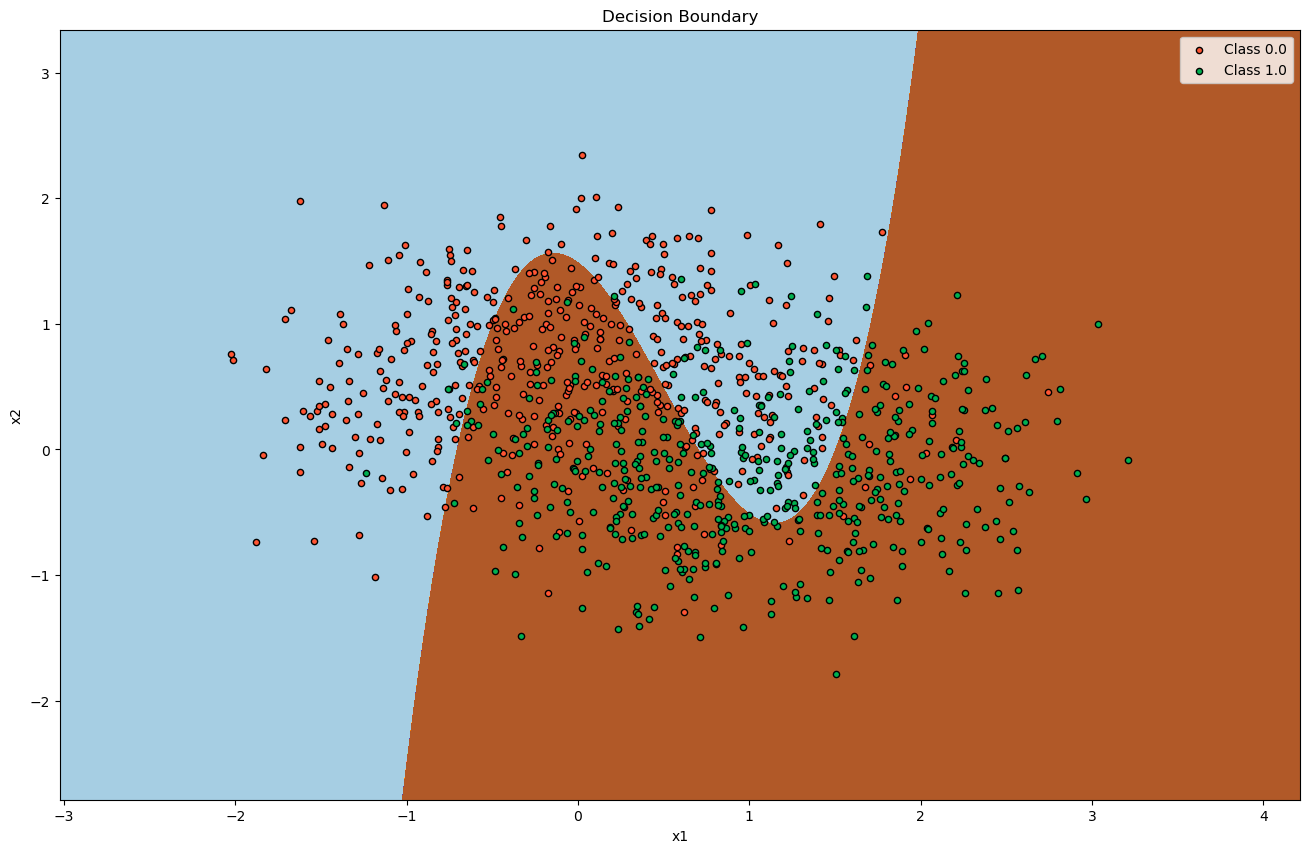

In [57]:
fig = plt.figure()
fig.set_size_inches(16, 10) 

pixel_step = 0.001

x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, pixel_step),
    np.arange(x2_min, x2_max, pixel_step)
)

Z = pipe.predict(pd.DataFrame(np.c_[xx1.ravel(), xx2.ravel()],
                              columns=["x1", "x2"]))
Z = Z.reshape(xx1.shape)

cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

plt.axis("tight")

for i, n, c in zip(range(2), pipe.classes_, ["#FF5533", "#00B050"]):
    idx = np.where(y == i)
    plt.scatter(
        X.values[idx, 0],
        X.values[idx, 1],
        c=c,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
    
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend(loc="upper right")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary")

plt.show()